# Daria Bromot - FS500047

## Tips Project

#### First importing Python Libraries

In [113]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Read the data

In [114]:
df = sns.load_dataset('tips')

In [115]:
df.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


#### Converting variables to type category:

In [116]:
df['sex']=df['sex'].astype('category')
df['smoker']=df['smoker'].astype('category')
df['day']=df['day'].astype('category') 
df['time']=df['time'].astype('category') 
print(*df.dtypes)

float64 float64 category category category category int64


#### Checking for missing or N/A values

In [117]:
print(*df.isna().any())

False False False False False False False


## Part 1. Describing the Tips Dataset using statistics

#### Categorical variables in the Tips dataset:

In [118]:
print("Table of characteristics of the categorical variables in the Tips dataset:\n")
df.describe(include=['category'])

Table of characteristics of the categorical variables in the Tips dataset:



,sex,smoker,day,time
count,244,244,244,244
unique,2,2,4,2
top,Male,No,Sat,Dinner
freq,157,151,87,176


The total count of variables is 244 so there are no missing observations.

- Sex: There are 157 male bill payers out of 244 observations leaving only 87 female bill-payers.

- Smoker: There a more non-smokers in the dataset with 151 out of the total of 244 observations having only non-smokers in the party while 93 parties include smokers.

- Time: The data includes 176 dinners out of 244 meals wuth the remaining 68 meals being lunches.

- Day: Saturday is the most frequent day in this dataset.

#### Describing the Tips dataset using plots

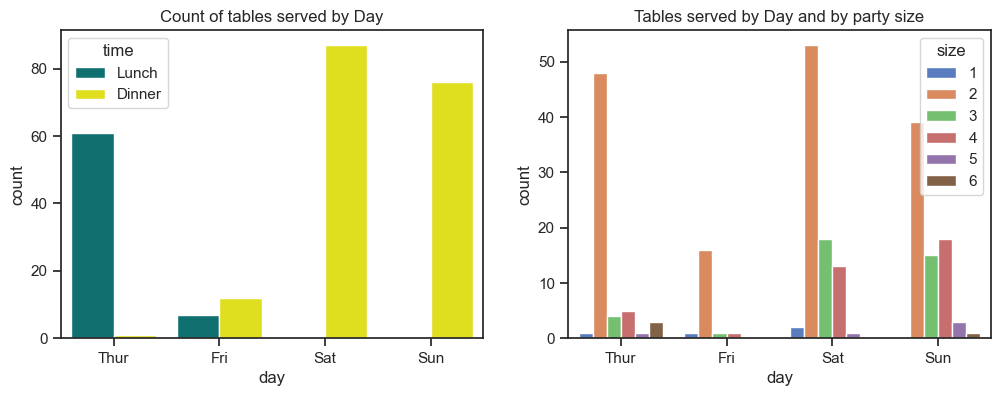

In [119]:
sns.set(style="ticks", palette="muted")

f, axes = plt.subplots(1, 2, figsize=(12, 4))
day_order=["Thur", "Fri", "Sat","Sun"] 

sns.countplot(x ="day",data =df, hue="time", palette=["teal","yellow"], order=day_order, ax=axes[0])
axes[0].set_title("Count of tables served by Day")

sns.countplot(x =("day"), hue="size",data =df, ax=axes[1], order=day_order)
axes[1].set_title("Tables served by Day and by party size");

- Fridays are the quietest days for this waiter. Saturdays are the busiest days followed by Sundays so there are more customers at the weekend. 
- The mosy common party size by far is 2. There are very few lone diners and very few parties of  5 and 6.

In [120]:
pal = dict(Lunch="seagreen", Dinner="gray")

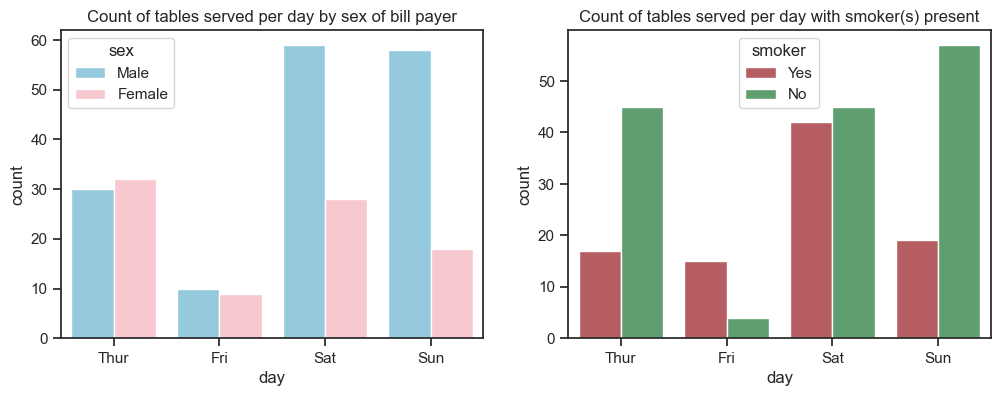

In [121]:
sns.set(style="ticks")

f, axes = plt.subplots(1, 2, figsize=(12, 4))
order=["Thur", "Fri", "Sat","Sun"]

gender_pal=dict(Female="pink",Male="skyblue")
smoker_pal=dict(Yes="r",No="g")

sns.countplot(x ="day", hue="sex", palette=gender_pal,data =df, order=order, ax=axes[0])
axes[0].set_title("Count of tables served per day by sex of bill payer")

sns.countplot(x =("day"), hue="smoker",data =df, ax=axes[1], palette=smoker_pal, order=day_order)
axes[1].set_title("Count of tables served per day with smoker(s) present");


- There are almost equal numbers of male and female bill-payers on Thursdays and Fridays but the number of male bill-player far out-weighs female bill-payers at the weekend. 
- There are more non-smokers than smokers on any day but especially on Thursdays and Sundays. While there are much less customers recorded for Fridays than any other days, these customers are mostly smokers. 
- There are almost equal number of male and female bill-paying customers for lunch but far more males for dinner. There are more male paying customers overall.


#### Boxplots of Total Bill amounts and Tip amounts

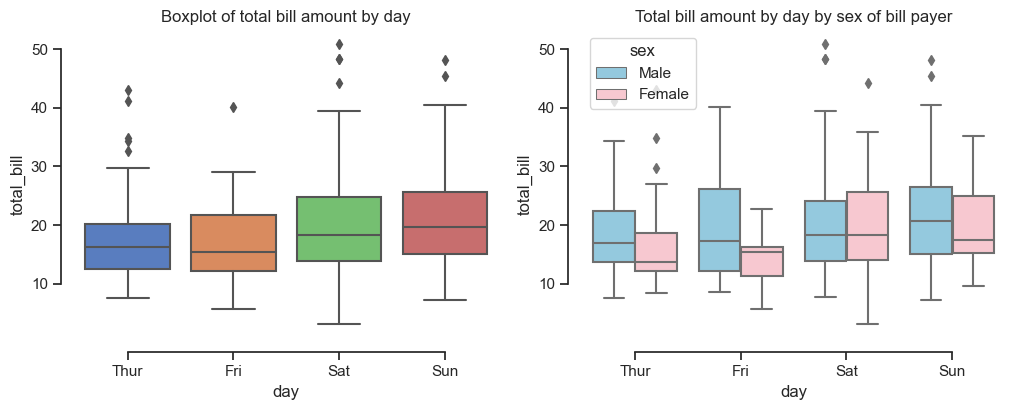

In [122]:
sns.set(style="ticks", palette="pastel")

f, axes = plt.subplots(1, 2, sharey=False, figsize=(12, 4))

sns.set(style="ticks", palette="muted")
sns.boxplot(x="day",y="total_bill" ,data=df, order=day_order, ax=axes[0])

axes[0].set_title("Boxplot of total bill amount by day")
sns.boxplot(x="day",y="total_bill" ,hue="sex",data=df, palette=gender_pal,order=day_order, ax=axes[1])

axes[1].set_title("Total bill amount by day by sex of bill payer")
sns.despine(offset=10, trim=True);

looking at the total bill amounts per day shows that the amount spent increases at the weekend and is lowest on a Friday. When broken down by the sex of the bill payer it seems that the median amount spent on the bill is higher for males than females and is also more variable for males. Saturday seems to be the only day when the median bills for males and females are similar although there is more of a right skew on the bill amounts by males. 

#### Adding additional variables



In [123]:
df['Tip%']=df['tip']/df['total_bill']*100
df['BillPP']=df['total_bill']/df['size']
df['TipPP']=df['tip']/df['size']
df['total_spent']=df['total_bill']+df['tip']
df.head()

,total_bill,tip,sex,smoker,day,time,size,Tip%,BillPP,TipPP,total_spent
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673,8.495000,0.505000,18.00
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159,3.446667,0.553333,12.00
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734,7.003333,1.166667,24.51
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041,11.840000,1.655000,26.99
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765,6.147500,0.902500,28.20


In [124]:
print(f"While the standard deviation of the total_bill amount was quite high at ${df['total_bill'].std():.2f}, the standard deviation of the bill per person seems more reasonable at ${df['BillPP'].std():.2f}")
print(f"This makes sense when the average (mean) bill per person is ${df['BillPP'].mean():.2f}.")
print(f"The tip amount as a percentage of the total bill amount is {df['Tip%'].mean():.2f} percent.\n")

While the standard deviation of the total_bill amount was quite high at $8.90, the standard deviation of the bill per person seems more reasonable at $2.91
This makes sense when the average (mean) bill per person is $7.89.
The tip amount as a percentage of the total bill amount is 16.08 percent.



## Part 2. Regression

#### Effect of Sex of bill payer on the relationship between total bill and tip amount
There are more male bill payers in the dataset than female bill payers, however the difference on the regression line is very small. There are fewer females paying higher bill amounts.

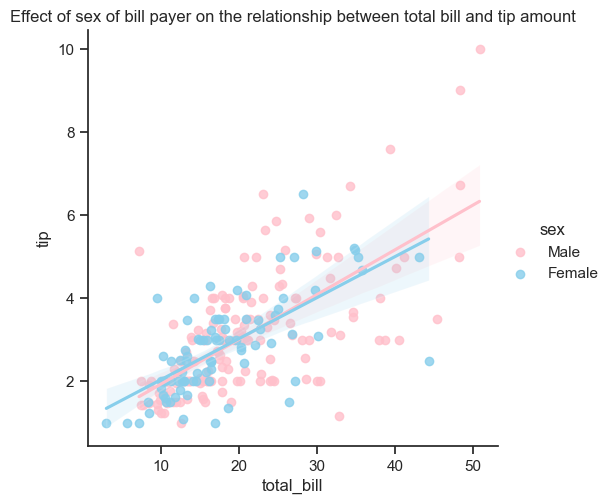

In [125]:
sns.lmplot(x="total_bill", y="tip", hue="sex",data=df, palette=["pink","skyblue"])
plt.title("Effect of sex of bill payer on the relationship between total bill and tip amount");

#### Effect of Smoker on the relationship between total bill and tip amount
It seems than non-smokers tend to be less generous for smaller bills but more generous at the higher end while non-smokers pay higher tips on lower bills but seem to get less generous relative to the bill as the bill increases.

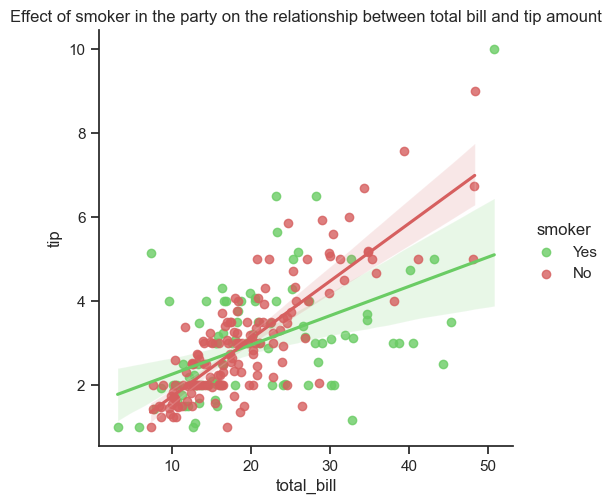

In [126]:
sns.lmplot(x="total_bill", y="tip", hue="smoker",data=df, palette=["g","r"])
plt.title("Effect of smoker in the party on the relationship between total bill and tip amount"); 

#### Effect of size, smoker and sex on the relationship between total bill and tip amount

The regression plot of tip against size shows that the tip amount increases by the size of the party up to a party size of 4 then the tip amount seems to fall a bit relative to the size for parties of 5 and 6 people.
There are very few parties of more than 4 in this dataset.

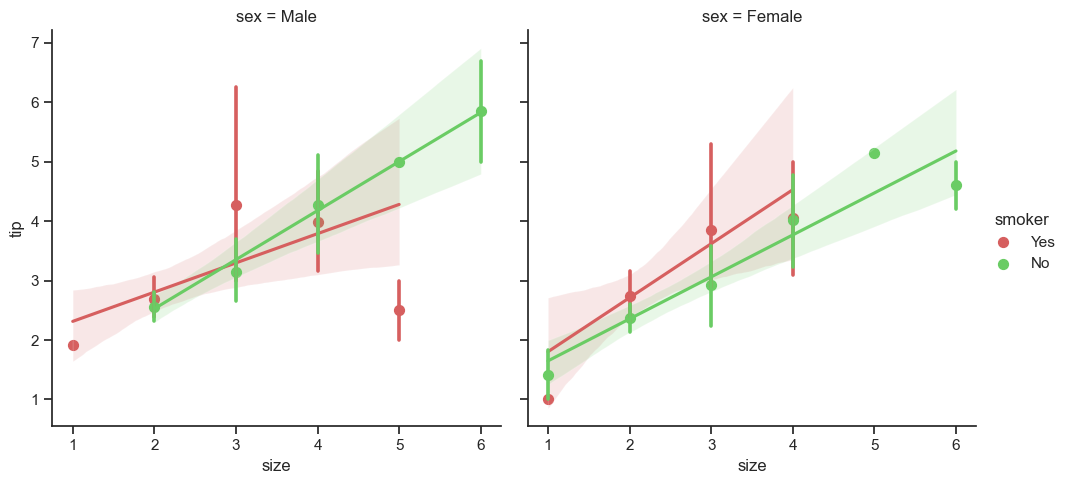

In [127]:
sns.lmplot(x="size", y="tip", hue="smoker",x_estimator=np.mean, data=df, col="sex",palette=smoker_pal);

#### Effect of Day of week and time on the relationship between total bill and tip amount.

The regression plots below show how the relationship between total bill and tip amount varies by day of the week and whether it is lunch or dinner time. 
Looking at dinners by day, the steepest lines is for dinner on a Thursday but this was a single observation so we can't infer much from this. Saturdays shows the steepest slope so tips become more generous relative to the bill as the bill amount grows. On the other hand people are more generous with tips for smaller bills.

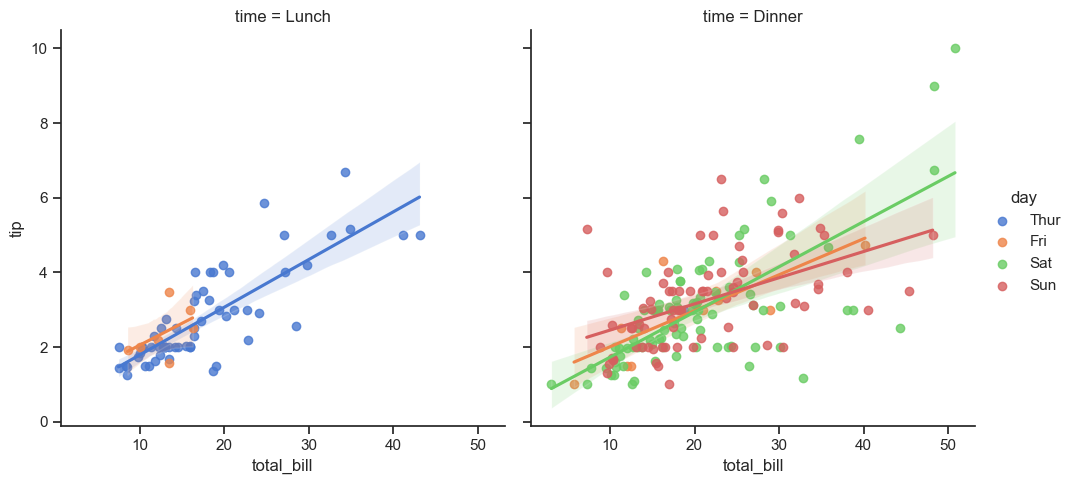

In [128]:
sns.lmplot(x='total_bill', y='tip', hue="day",col="time",data=df);

## Part 3. Relationship between the variables within the dataset

#### Mattering of custom characteristics - gender and smoker

The plots on the bottom row show that there is a lot more variability in the tips given when smokers are present compared to non-smokers in the top row. Comparing males to females it seems that female non-smokers have the least variability of tip amounts of the 4 groups. The higher bill amounts are generally paid for by males, and mostly with no smokers. 

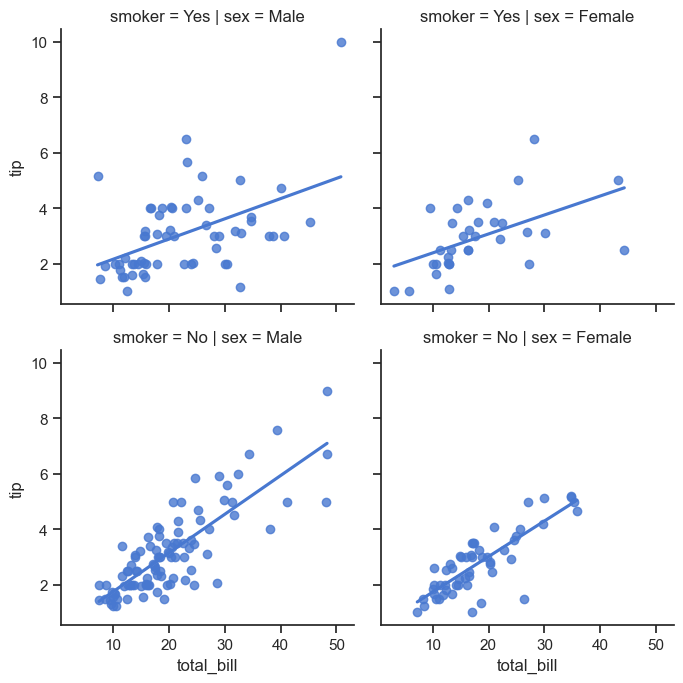

In [129]:
sns.lmplot(x="total_bill", y="tip", col="sex", row="smoker",ci=False,data=df, height=3.5, aspect =1); 

#### The characteristics of customers in the dataset
This plot below shows that while the weekends were busiest overall, Saturdays were the busiest of the 4 days for smokers, both male and female. The proportion of smokers on Fridays was highest but the overall number of tables served on Fridays was quite small. There are more male than female bill payers in the dataset, more female non-smokers on Thursdays than male non-smokers. 

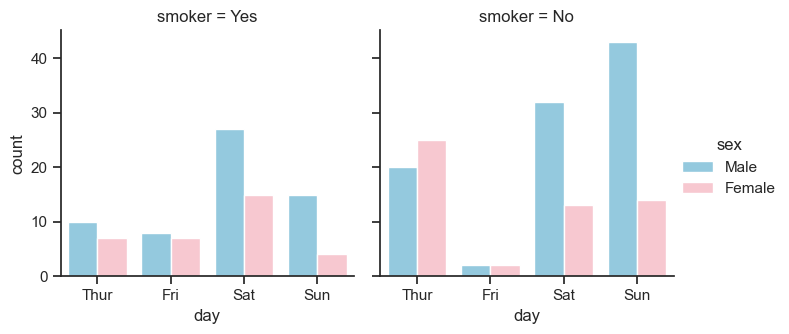

In [130]:
sns.catplot(x="day", kind="count", data=df, hue="sex", col="smoker", palette=gender_pal, height=3.5, aspect =1, order=day_order)
plt.show()

#### Total bill amounts per day by sex and smoker

The swarm plots also shows how the total bill amounts were distributed. The lowest 2 bills were paid for by females with smokers in the party. The largest bill was paid for by male with smoker present. There were a few large bills on weekends paid for by males across both smoking levels.

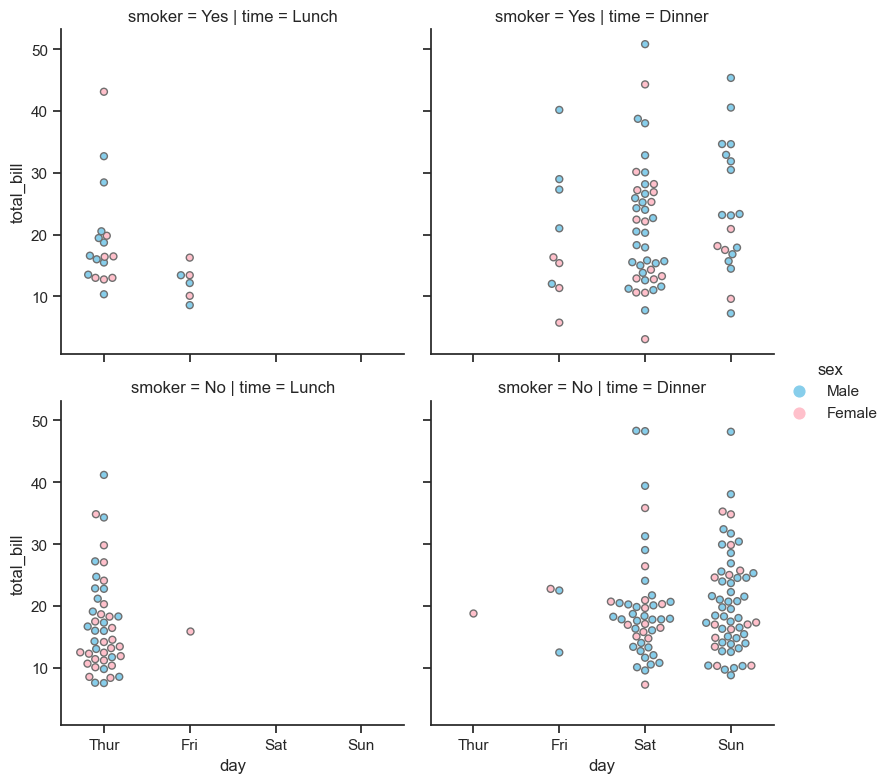

In [131]:
sns.set(style="ticks")
g= sns.catplot(x="day", y="total_bill", hue="sex",row="smoker", col="time", data=df, palette=gender_pal, height=4, 
               aspect =1, kind="swarm", linewidth=1, order=day_order);


1. On Friday most meals served were dinners, there were more smoking than non-smoking parties and an almost even split between male and female bill payers.
2. Saturday then was busier than the weekdays but only dinners were served. There was quite a few more male bill payers than female bill payers and there was nearly the same number of parties with smokers present as non-smokers.
3. Sundays was again very busy but had less smokers present, the bills were still mostly settled by males. 

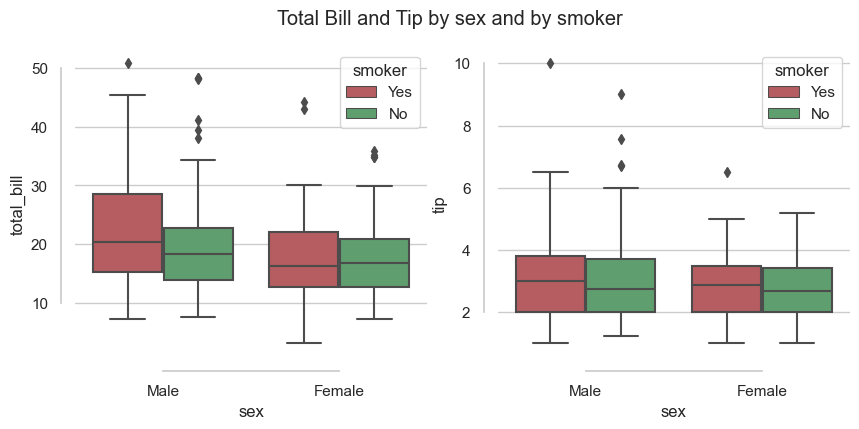

In [132]:
sns.set(style="whitegrid")

f, axes = plt.subplots(1, 2, sharey=False, figsize=(10, 4))

sns.boxplot(x="sex",y="total_bill" ,hue="smoker",data=df, palette=smoker_pal, ax=axes[0]) 
sns.boxplot(x="sex",y="tip" ,hue="smoker",data=df, palette=smoker_pal, ax=axes[1]) 

sns.despine(offset=10, trim=True)
plt.suptitle("Total Bill and Tip by sex and by smoker");

The boxplots above show that while male smokers tend more towards higher bills than male non-smokers or females (smokers and non-smokers), the median tip amount does not seem to rise as much as you would expect relative to the bill.

#### Average tips paid by sex and smoker:

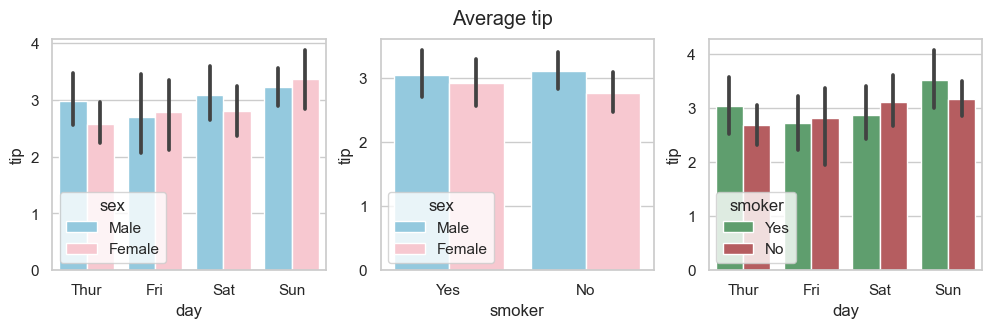

In [133]:
sns.set(style="whitegrid")

f, axes = plt.subplots(1, 3, figsize=(12, 3)) 
order=["Thur", "Fri", "Sat","Sun"]

sns.barplot(x ="day", y="tip", hue="sex", palette=gender_pal,data =df, order=day_order, ax=axes[0]) 
sns.barplot(x ="smoker", y="tip", hue="sex", palette=gender_pal,data =df, ax=axes[1])
sns.barplot(x ="day", y="tip", hue="smoker", palette=["g","r"],data =df, order=order, ax=axes[2])

plt.suptitle("Average tip");

1. There are almost equal numbers of male and female bill-payers on Thursdays and Fridays but the number of male bill-player far out-weighs female bill-payers at the weekend. This could be for any number of reasons and we don't know the gender of their dining companions.
2. There are more non-smokers than smokers on any day but especially on Thursdays and Sundays. While there are much less customers recorded overall for Fridays than any other days, these customers are mostly smokers. 
3. There are almost equal number of male and female bill-paying customers for lunch but far more males for dinner. There are more male paying customers overall.

#### Influencing of the size of the groups

The boxplots show that total bill amounts and tip amounts rise by party size while the bill per person falls. 
The percentage tip by larger parties seems to fall in a similar range to those of smaller parties, with the exception of of the few single diners. The median percentage tip does fall a bit for parties of 5 but there are very few observations in this category. 

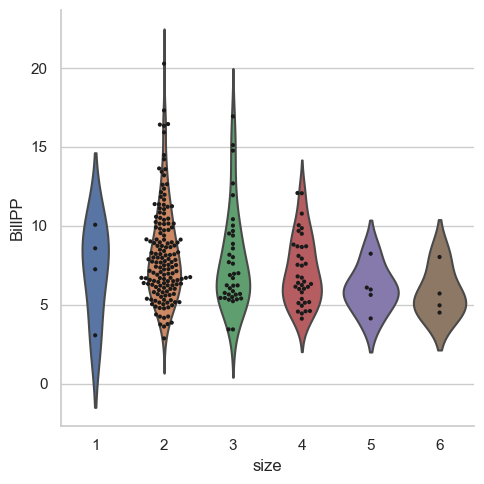

In [134]:
g = sns.catplot(x="size", y="BillPP", kind="violin", inner=None, data=df)
sns.swarmplot(x="size", y="BillPP", color="k", size=3, data=df, ax=g.ax);

## Summary
In part 1 the tips dataset was described using statistics and plots using the `pandas` and `seaborn` libraries. 

Part 2 include some regression plots showing the individual effects of sex of bill payer and smoker status on the relationship between the total bill amount and the tip. The effect of the size of the party was also shown to influence the outcome tip amount and rate.

Part 3 now looks at some of the relationships between the different variables in the dataset.